In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import get_data

(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

# Aggregated Daily Sentiment

In [88]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [91]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

In [116]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, mean_location=None, significant_points=None, timeframe=None, colors=None, average_compound=None, save_path=None):
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

    if significant_points:
        for point in significant_points:
            point_date = pd.to_datetime(point).date()
            if point_date in daily_sentiment['day'].values:
                plt.scatter(point_date, daily_sentiment.loc[daily_sentiment['day'] == point_date, 'Compound'], color=colors[0], s=100, edgecolor='black', zorder=5)

    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)

    if average_compound:
        plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f"{president.capitalize()} Mean Sentiment Score in {location} ({average_compound:.2f})")
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02
        plt.text(daily_sentiment['day'].max(), average_compound + offset, f' {average_compound:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

    # Plot the second horizontal line if the value is provided
    if mean_location is not None:
        plt.axhline(mean_location, color=colors[0], linestyle='--', linewidth=2, label=f'Mean {location} Sentiment Score ({mean_location:.2f})')
        # Adjust the label position for the second line
        offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.03  # Slightly larger offset for clarity
        plt.text(daily_sentiment['day'].max(), mean_location - offset, f' {mean_location:.2f}', verticalalignment='top', horizontalalignment='right', color=colors[0], fontsize=10)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()
    plt.ylim(-1, 1)
    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()

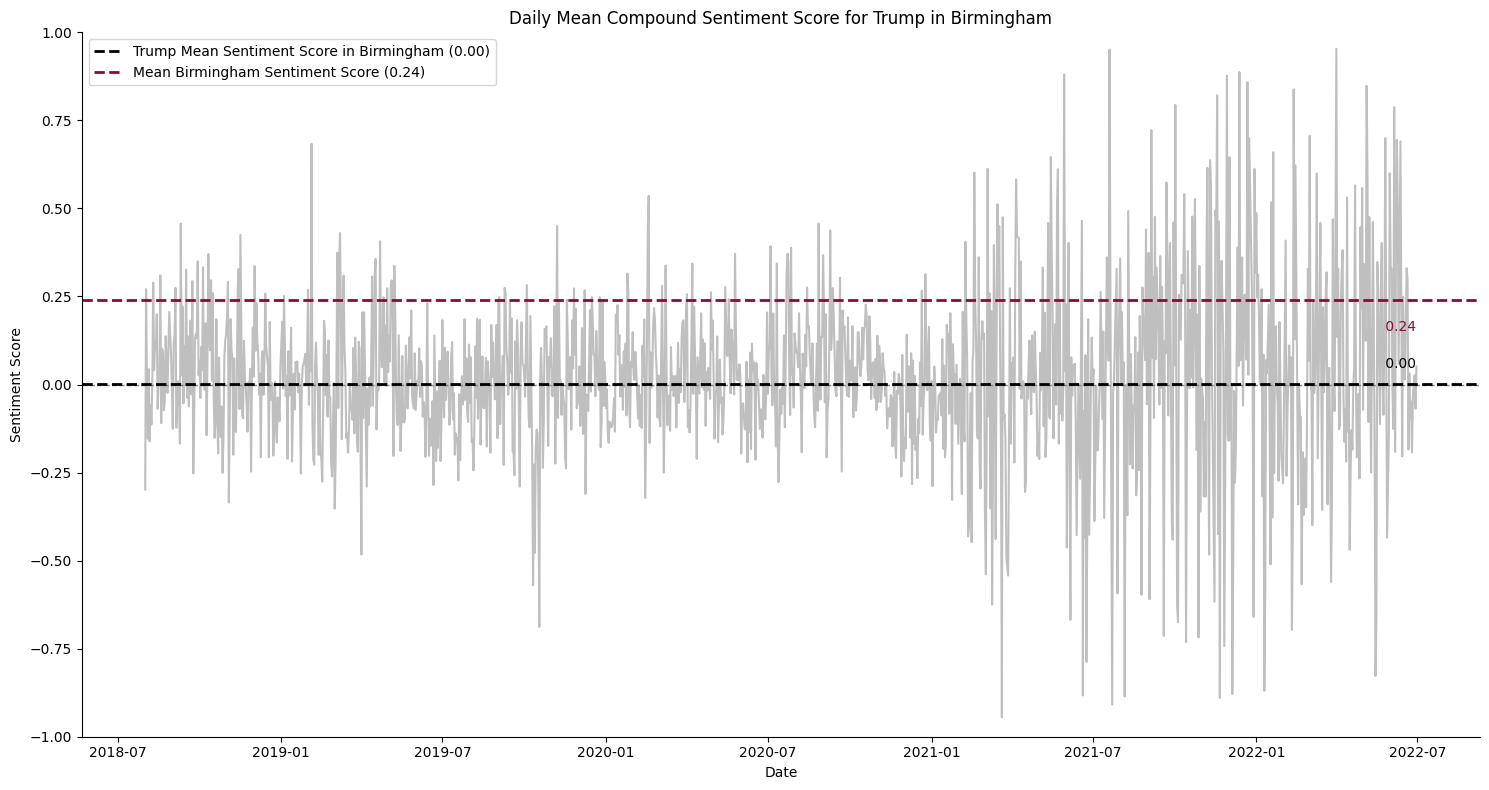

In [117]:
for president in presidents:
    for location in (cities + countries):
        title = f'Daily Mean Compound Sentiment Score for {president.capitalize()} in {location}'
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title,
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/compound_sentiment/{president}-{location}.png')

# Aggregated Tweet Count

Method: 
1. Data Aggregation: Aggregate the data into daily counts with `aggregate_tweet_count()`
2. 

##### Data Aggregation

In [35]:
def aggregate_daily_counts(df, date_column='day'):
    """
    Aggregate the total count of rows for each day in a dataframe.

    Parameters:
    df (DataFrame): The original dataframe with a 'day' column.
    date_column (str): The name of the column containing the dates. Defaults to 'day'.

    Returns:
    DataFrame: A new dataframe with columns 'day' and 'tweet_count', representing the count of rows per day.
    """
    return df.groupby(date_column).size().reset_index(name='tweet_count')

def aggregate_tweet_count(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        # load data
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        # aggregate day to get daily tweet count
        aggregated_data = aggregate_daily_counts(data)
        daily_tweet_counts[location] = aggregated_data['tweet_count']
    daily_tweet_counts['day'] = aggregated_data['day']
    daily_tweet_counts.set_index('day')
    # calculate 'All'
    filepath = f'{data_path}{president}.pkl'
    data = pd.read_pickle(filepath)
    data, _ = add_day_and_get_daily_sentiment(data)
    aggregated_data = aggregate_daily_counts(data)
    daily_tweet_counts['All'] = aggregated_data['tweet_count']
    return daily_tweet_counts

In [61]:
def has_NaN(data):
    if data.isnull().values.any():
        return True

In [70]:
xx = aggregate_tweet_count(presidents[0])
has_NaN(xx)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Festplatte/data-UA/data/trump.pkl'

In [67]:
def x(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        # load data
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        # aggregate day to get daily tweet count
        aggregated_data = aggregate_daily_counts(data)
        daily_tweet_counts[location] = aggregated_data['tweet_count']
    daily_tweet_counts['day'] = aggregated_data['day']
    # daily_tweet_counts.set_index('day')
    # calculate 'All'
    filepath = f'{data_path}{president}.pkl'
    data = pd.read_pickle(filepath)
    data, _ = add_day_and_get_daily_sentiment(data)
    aggregated_data = aggregate_daily_counts(data)
    daily_tweet_counts['All'] = aggregated_data['tweet_count']
    return daily_tweet_counts

In [69]:
xxx = x(presidents[0])
has_NaN(xxx)

If this does not return true, it might be the set-index('day')

In [63]:
def x(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        print(location)
        # load data
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        has_NaN(data)
        print("data")
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        has_NaN(data)
        print("data add day")
        # aggregate day to get daily tweet count
        aggregated_data = aggregate_daily_counts(data)
        has_NaN(data)
        print("data aggregated: aggregate_daily_counts")
        daily_tweet_counts[location] = aggregated_data['tweet_count']
        has_NaN(data)
        print("data add tweet count: aggregated_data")
x(presidents[0])

Great Britain
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data
US
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data
Birmingham
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data
LA
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data
London
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data
NYC
data
data add day
data aggregated: aggregate_daily_counts
data add tweet count: aggregated_data


In [ ]:
has_NaN(pd.DataFrame(columns=['day', 'All'] + countries + cities))

In [ ]:
# aggregate daily tweets for both presidents
daily_tweet_counts_trump = aggregate_tweet_count(presidents[0])
daily_tweet_counts_johnson = aggregate_tweet_count(presidents[1])
# save data
daily_tweet_counts_trump.to_pickle(f'{data_path}daily_tweet_counts_trump.pkl')
daily_tweet_counts_johnson.to_pickle(f'{data_path}daily_tweet_counts_johnson.pkl')

Save the numer of days for `get_mean_tweets_per_day()` in `./data_overview.ipynb`

In [38]:
import json
from get_mean_count import save_results
number_of_days = {"number_of_days": daily_tweet_counts_trump.shape[0]}
save_results(number_of_days, 'results/number_of_days.json')

Results saved to results/number_of_days.json


Inspect data to verify data quality

In [65]:
daily_tweet_counts_trump.head()

,day,All,Great Britain,US,Birmingham,LA,London,NYC
0,2018-08-01,2069,191,1878,15.0,969,176,909
1,2018-08-02,1724,161,1563,18.0,736,143,827
2,2018-08-03,1400,146,1254,14.0,623,132,631
3,2018-08-04,2258,188,2070,18.0,1243,170,827
4,2018-08-05,1815,197,1618,27.0,807,170,811


In [40]:
daily_tweet_counts_johnson.head()

,day,All,Great Britain,US,Birmingham,LA,London,NYC
0,2018-08-01,154,89,65,24,39,65,26
1,2018-08-02,149,57,92,10,53,47,39
2,2018-08-03,126,46,80,7,51,39,29
3,2018-08-04,125,59,66,12,41,47,25
4,2018-08-05,137,58,79,17,28,41,51


In [41]:
def plot_daily_tweet_counts(tweet_counts, title, count_columns, colors=colors, timeframe=None, save_path=None, highlight_top_ten=None):
    """
    Plot the daily tweet counts for multiple series with a modern design, including options for highlights and timeframes. Highlights the top ten tweet counts for each series.

    Parameters:
    tweet_counts (DataFrame): Data containing the daily tweet counts with columns 'day' and multiple 'tweet_count_X' columns.
    title (str): The title of the plot.
    count_columns (list): List of column names containing the tweet counts to be plotted.
    colors (list, optional): Colors for the tweet count lines. If None, default colors will be used.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    save_path (str, optional): Path to save the figure.
    highlight_top_ten (bool, optional): Whether to highlight the top ten tweet counts.
    """
    plt.figure(figsize=(15, 8))
    
    if colors is None:
        colors = sns.color_palette('husl', len(count_columns))  # Generate as many colors as count columns
    
    # Plot each tweet count linedaily_tweet_counts_trump
    for i, count_column in enumerate(count_columns):
        sns.lineplot(x='day', y=count_column, data=tweet_counts, color=colors[i], label=count_column)
        
        if highlight_top_ten:
            # Sort the DataFrame by 'tweet_count' column in descending order and take the top ten
            top_ten_tweet_counts = tweet_counts.sort_values(by=count_column, ascending=False).head(10)
            # Highlight the top ten tweet counts
            for _, row in top_ten_tweet_counts.iterrows():
                point_datetime = pd.to_datetime(row['day'])
                tweet_count_at_point = row[count_column]
                plt.scatter(point_datetime, tweet_count_at_point, color=colors[i], s=50, zorder=5)
                # Adjusted text positioning
                text_x_position = point_datetime - pd.Timedelta(days=-10)  # Adjust as needed for your specific date format and plot
                plt.text(text_x_position, tweet_count_at_point, f"{row['day']}\n{tweet_count_at_point}", color='black', ha='left', va='bottom')

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Highlighted Period')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()

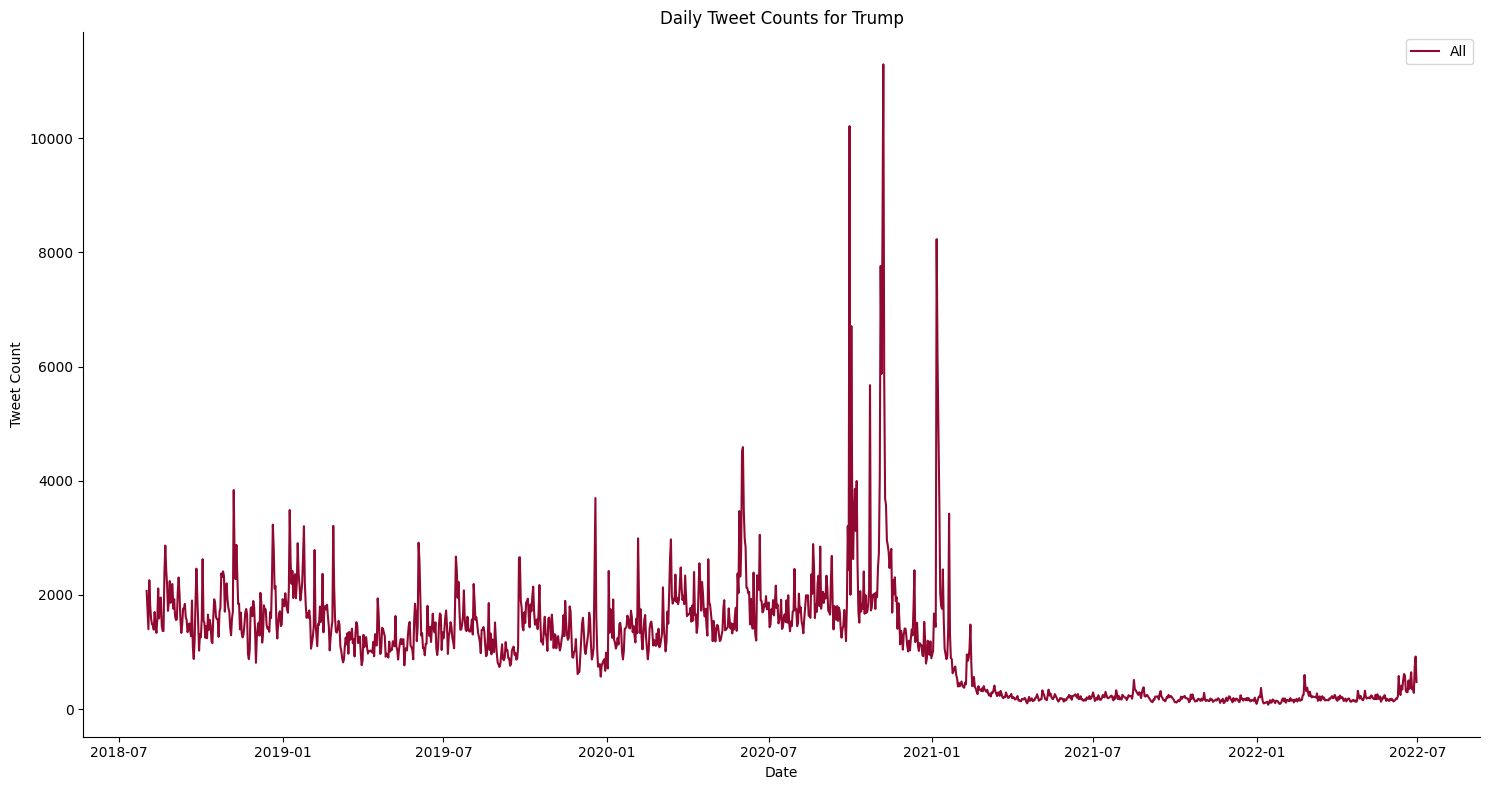

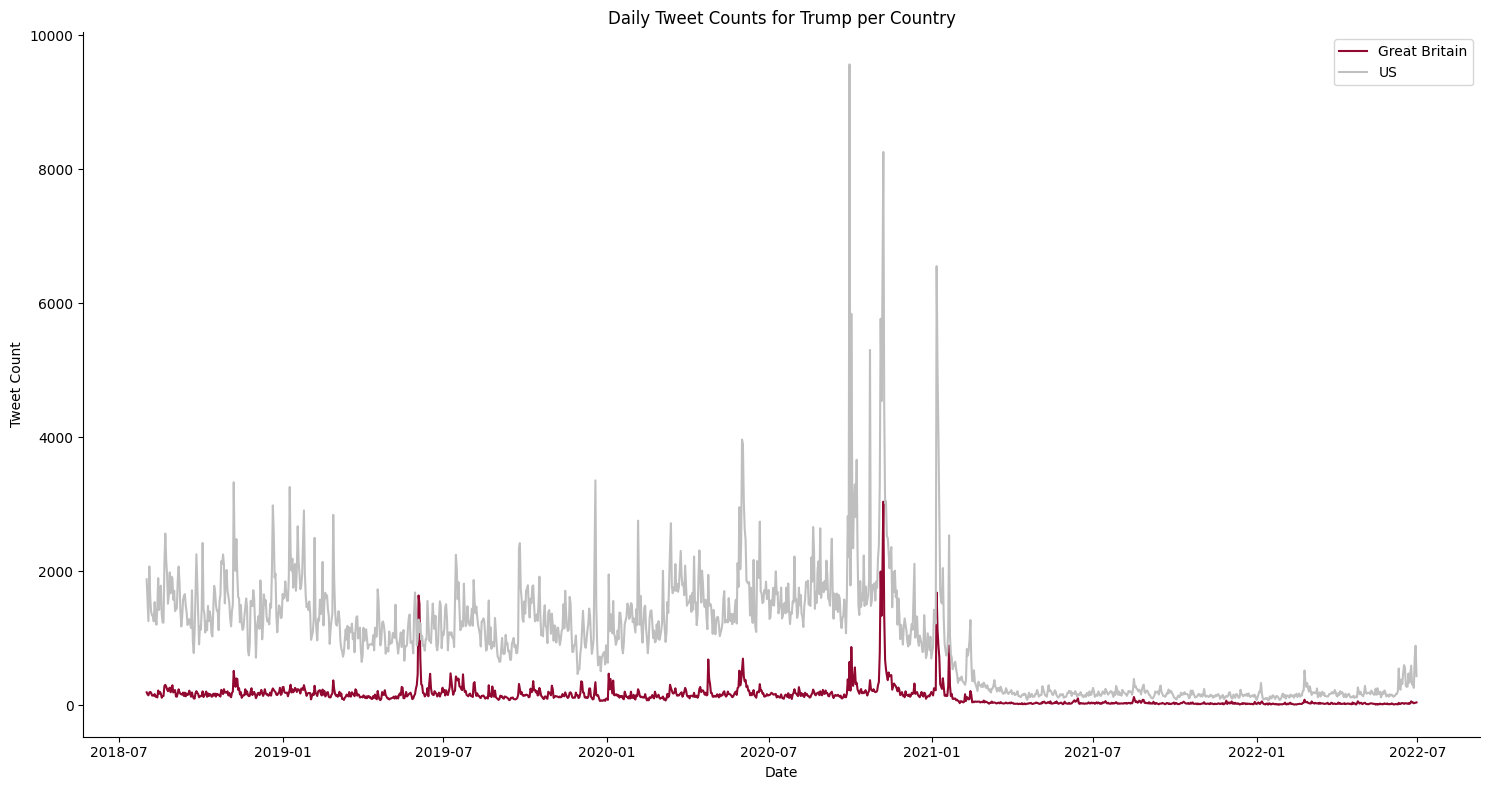

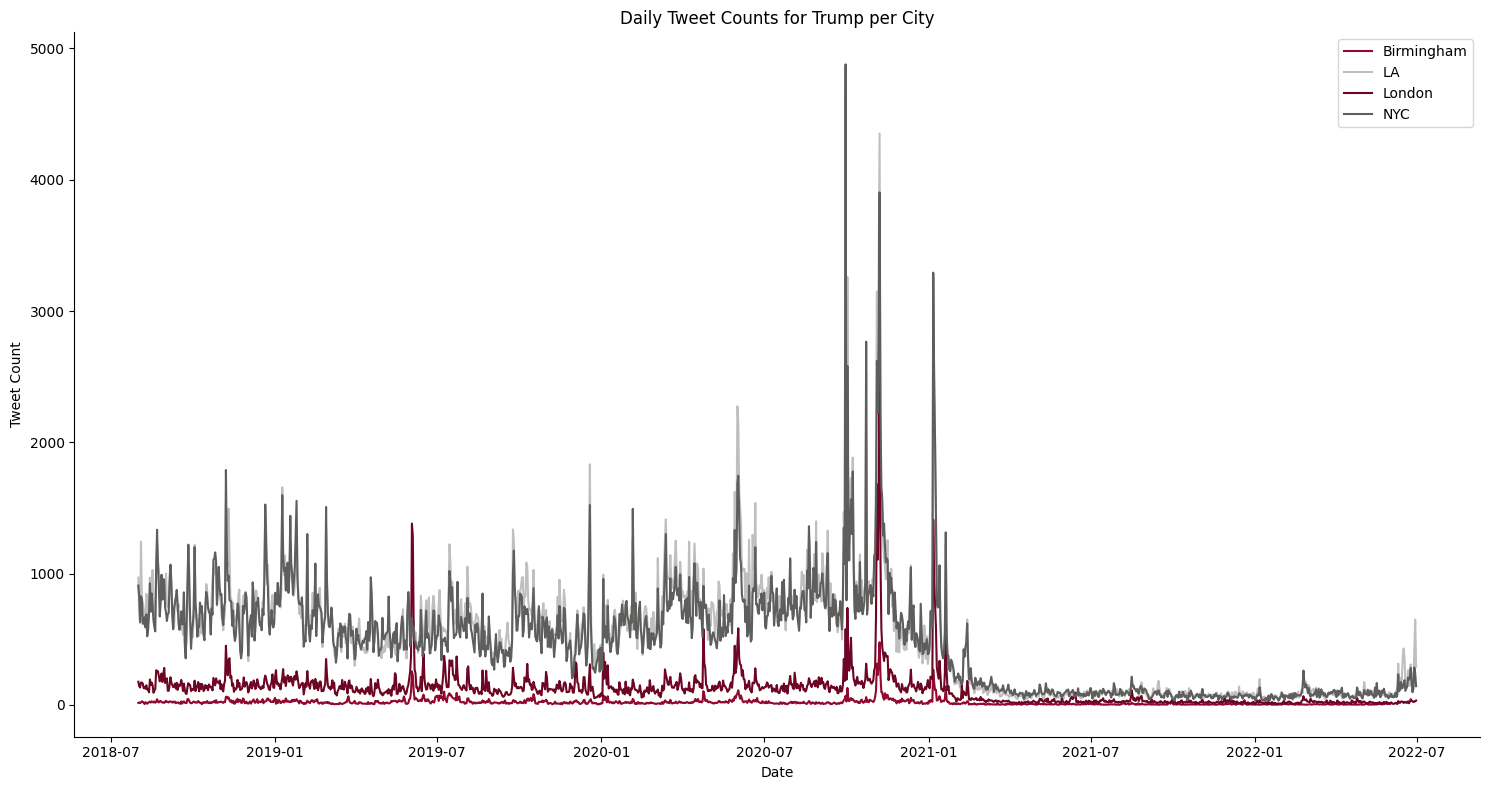

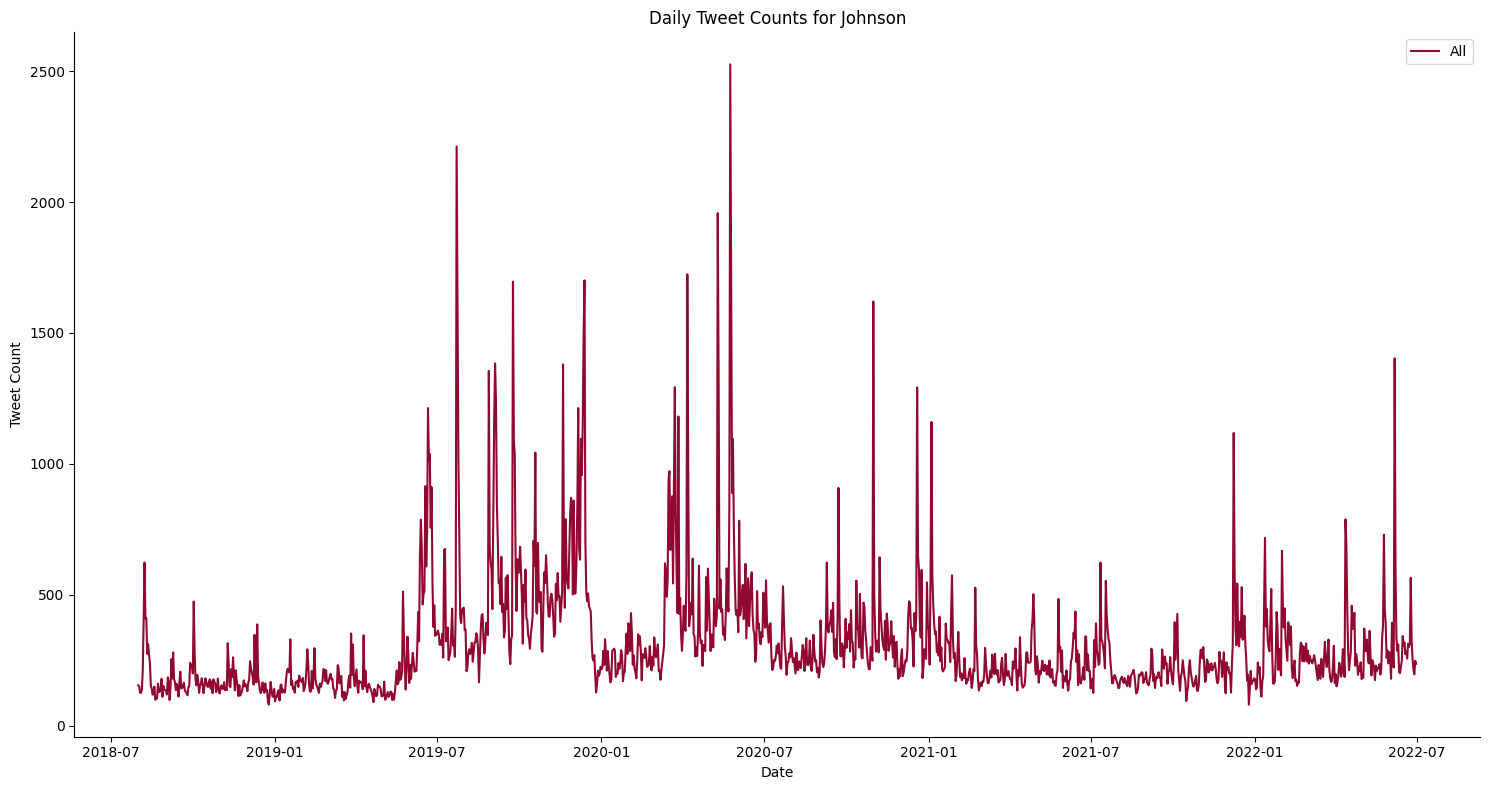

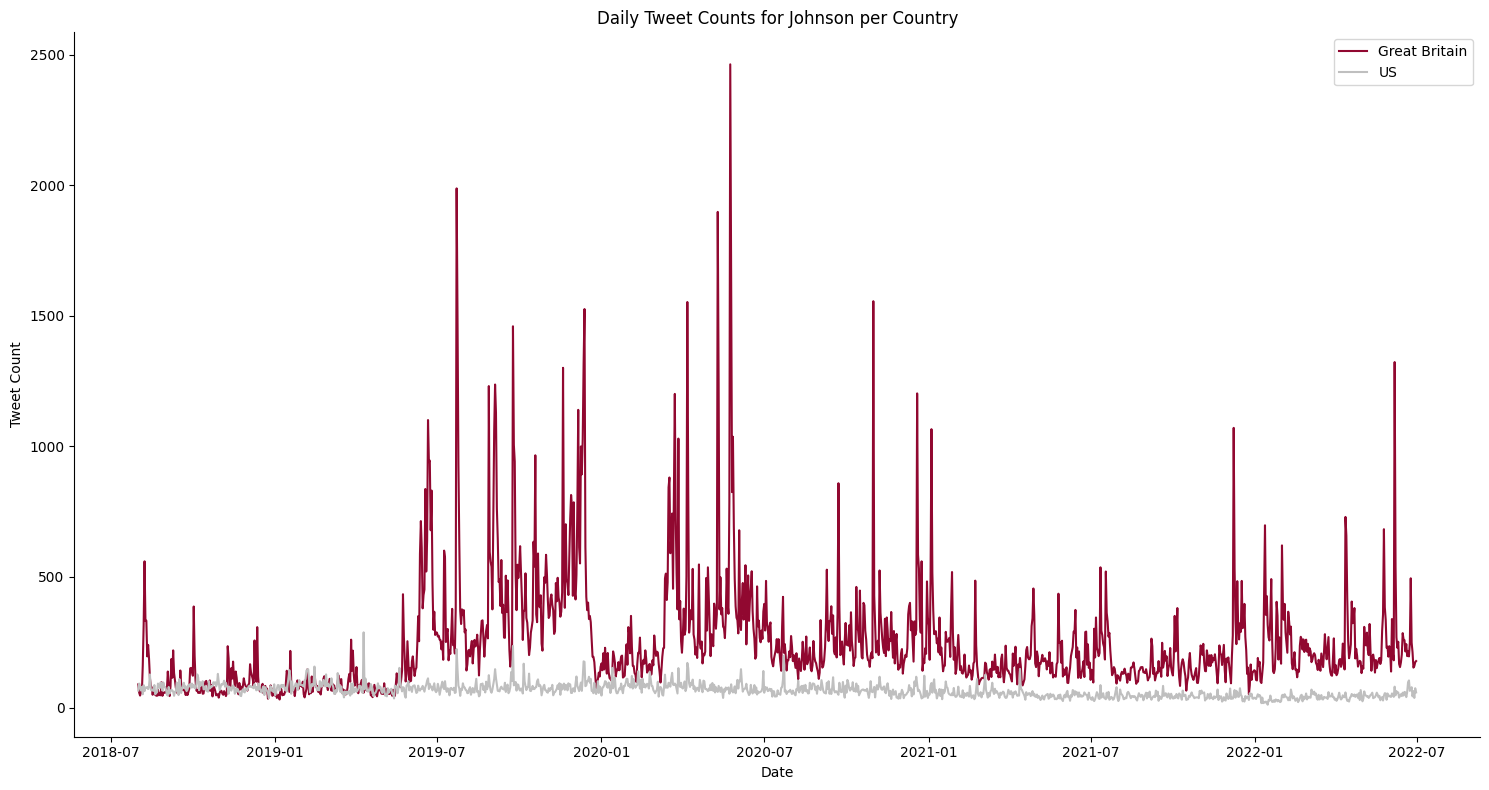

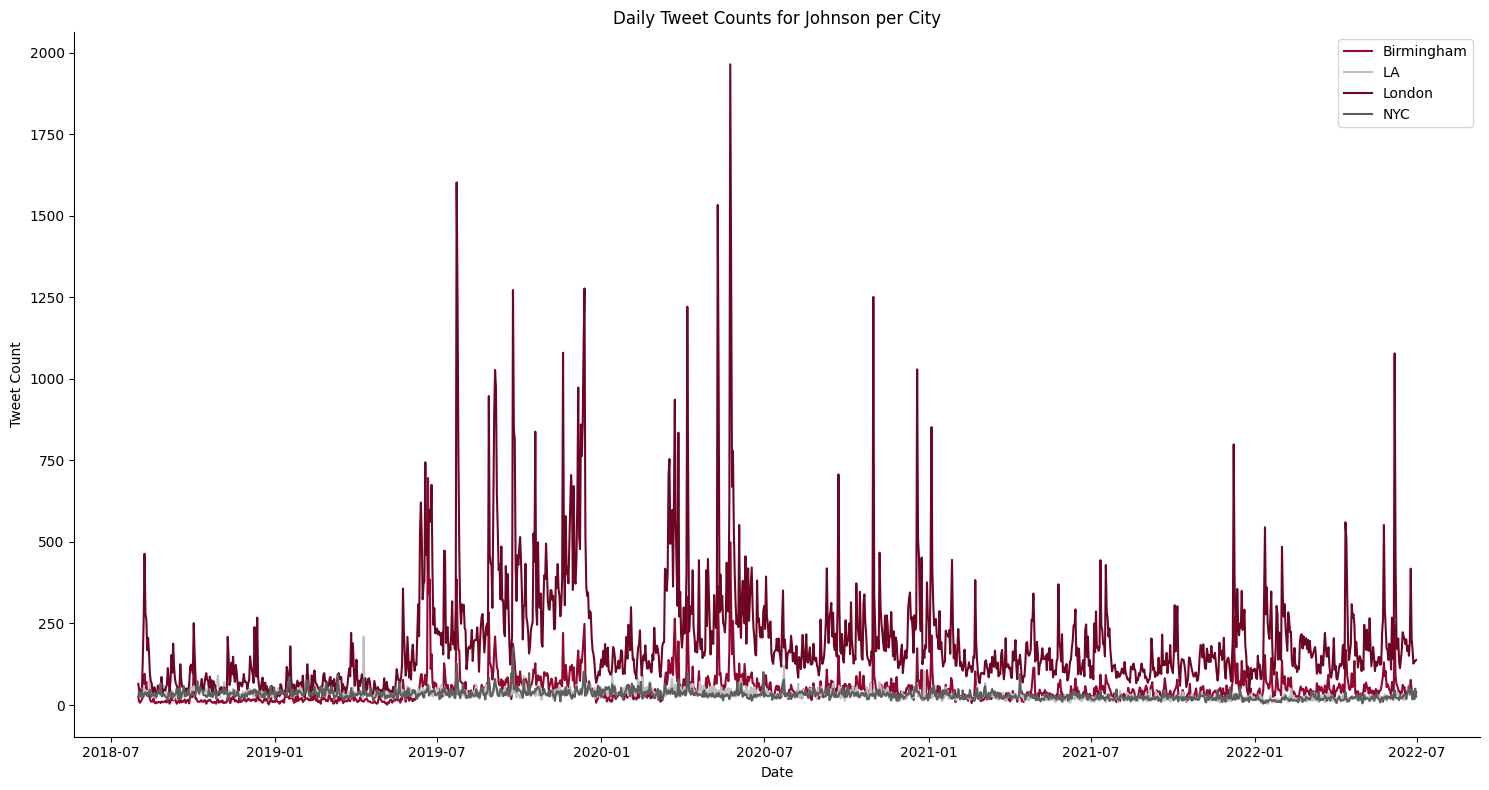

In [42]:
for president in presidents:
    data = daily_tweet_counts_trump if president == presidents[0] else daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-tweet_count.png'
    )

##### Normalize Daily Post Count

Normalize the daily post count by dividing with the monthly post count

In [77]:
import pandas as pd
monthly_tweet_count = pd.read_pickle('results/monthly_tweet_count.pkl')
monthly_tweet_count

,2018_08,2018_09,2018_10,2018_11,2018_12,2019_01,2019_02,2019_03,2019_04,2019_05,...,2021_09,2021_10,2021_11,2021_12,2022_01,2022_02,2022_03,2022_04,2022_05,2022_06
Birmingham,191433.0,191579.0,210056.0,196021.0,191220.0,192694.0,180492.0,176343.0,171053.0,189581.0,...,117748.0,115224.0,115670.0,120246.0,92343.0,83309.0,101421.0,108992.0,125573.0,123247.0
LA,1171088.0,1154324.0,1231818.0,1112827.0,1081696.0,1181323.0,1086208.0,925107.0,965585.0,1000215.0,...,619445.0,661769.0,605353.0,587364.0,419469.0,441942.0,551023.0,561438.0,626102.0,627947.0
London,788735.0,823528.0,852263.0,825937.0,788404.0,833817.0,761305.0,745724.0,701682.0,779578.0,...,468218.0,485879.0,464786.0,467816.0,354041.0,330898.0,399953.0,411581.0,485100.0,473426.0
NYC,1038041.0,1077902.0,1118985.0,1012020.0,984489.0,1008954.0,911139.0,817539.0,844749.0,891154.0,...,610744.0,610459.0,582877.0,574649.0,423957.0,404103.0,518088.0,505101.0,561737.0,602978.0
Great Britain,980168.0,1015107.0,1062319.0,1021958.0,979624.0,1026511.0,941797.0,922067.0,872735.0,969159.0,...,585966.0,601103.0,580456.0,588062.0,446384.0,414207.0,501374.0,520573.0,610673.0,596673.0
US,2209129.0,2232226.0,2350803.0,2124847.0,2066185.0,2190277.0,1997347.0,1742646.0,1810334.0,1891369.0,...,1230189.0,1272228.0,1188230.0,1162013.0,843426.0,846045.0,1069111.0,1066539.0,1187839.0,1230925.0
All,3189297.0,3247333.0,3413122.0,3146805.0,3045809.0,3216788.0,2939144.0,2664713.0,2683069.0,2860528.0,...,1816155.0,1873331.0,1768686.0,1750075.0,1289810.0,1260252.0,1570485.0,1587112.0,1798512.0,1827598.0


In [79]:
countries + cities + ['All']

['Great Britain', 'US', 'Birmingham', 'LA', 'London', 'NYC', 'All']

In [81]:
def normalize_daily_tweet_counts(daily_tweet_counts):
    # Convert the 'day' column in daily_tweet_counts to datetime to easily extract year and month
    daily_tweet_counts['day'] = pd.to_datetime(daily_tweet_counts['day'])
    
    # For each location, normalize the daily tweet count
    locations = countries + cities + ['All']
    
    for location in locations:
        # Apply normalization for each row
        daily_tweet_counts[location] = daily_tweet_counts.apply(lambda row: normalize_row(row, location), axis=1)
    
    return daily_tweet_counts

def normalize_row(row, location):
    # Extract year and month from the 'day' column
    year_month = row['day'].strftime('%Y_%m')
    
    # Lookup the monthly tweet count for the location
    monthly_count = monthly_tweet_count.loc[location, year_month]
    
    # Return the normalized daily count
    return row[location] / monthly_count if monthly_count else row[location]

In [82]:
# normalize data with normalize_daily_tweet_counts
normalized_daily_tweet_counts_trump = normalize_daily_tweet_counts(daily_tweet_counts_trump)
normalized_daily_tweet_counts_johnson = normalize_daily_tweet_counts(daily_tweet_counts_johnson)
del daily_tweet_counts_trump, daily_tweet_counts_johnson
# save data
normalized_daily_tweet_counts_trump.to_pickle(f'{data_path}normalized_daily_tweet_counts_trump.pkl')
normalized_daily_tweet_counts_johnson.to_pickle(f'{data_path}normalized_daily_tweet_counts_johnson.pkl')

In [85]:
normalized_daily_tweet_counts_trump.head()

,day,All,Great Britain,US,Birmingham,LA,London,NYC
0,2018-08-01,0.000649,0.000195,0.000850,0.000078,0.000827,0.000223,0.000876
1,2018-08-02,0.000541,0.000164,0.000708,0.000094,0.000628,0.000181,0.000797
2,2018-08-03,0.000439,0.000149,0.000568,0.000073,0.000532,0.000167,0.000608
3,2018-08-04,0.000708,0.000192,0.000937,0.000094,0.001061,0.000216,0.000797
4,2018-08-05,0.000569,0.000201,0.000732,0.000141,0.000689,0.000216,0.000781


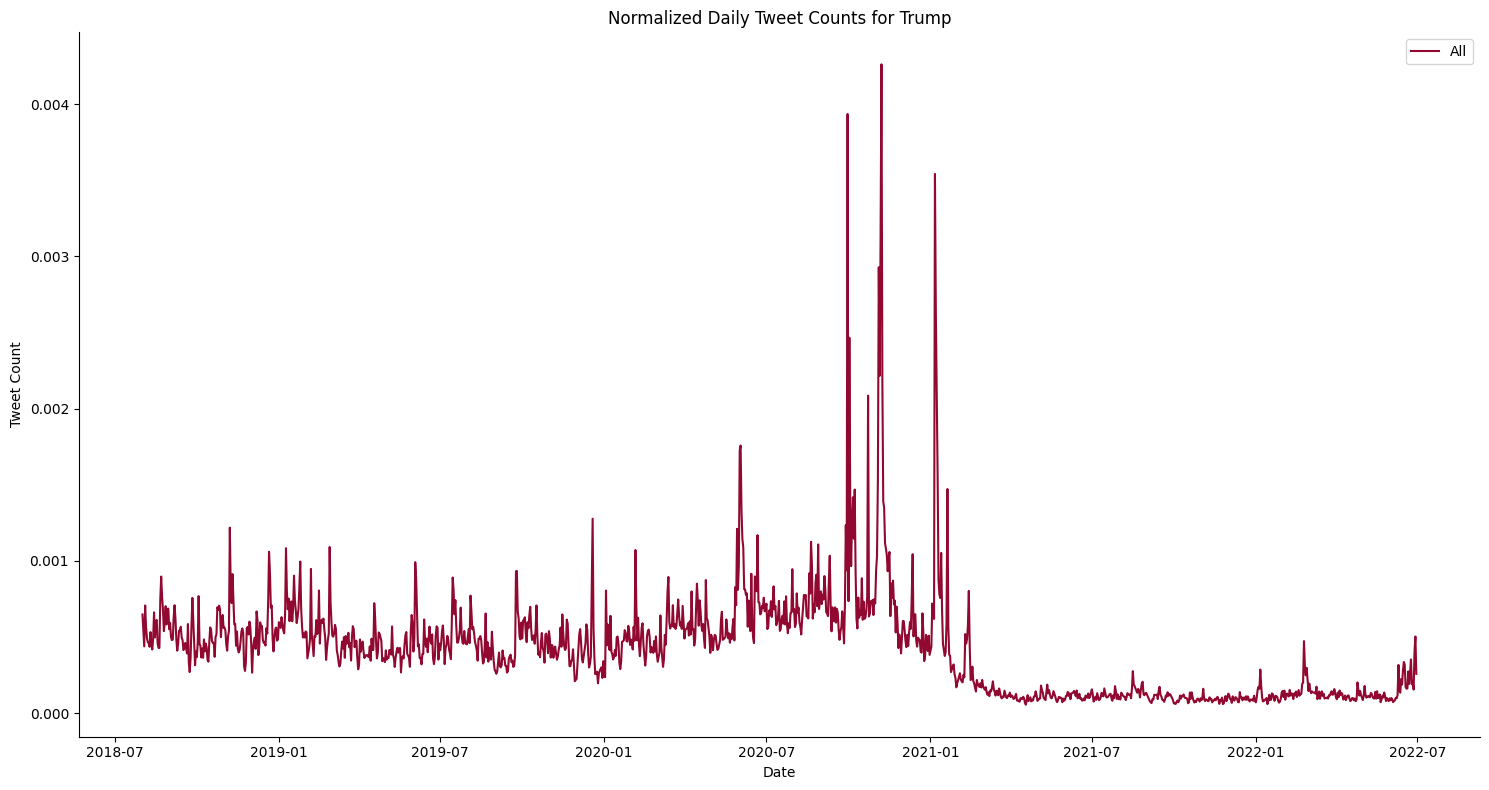

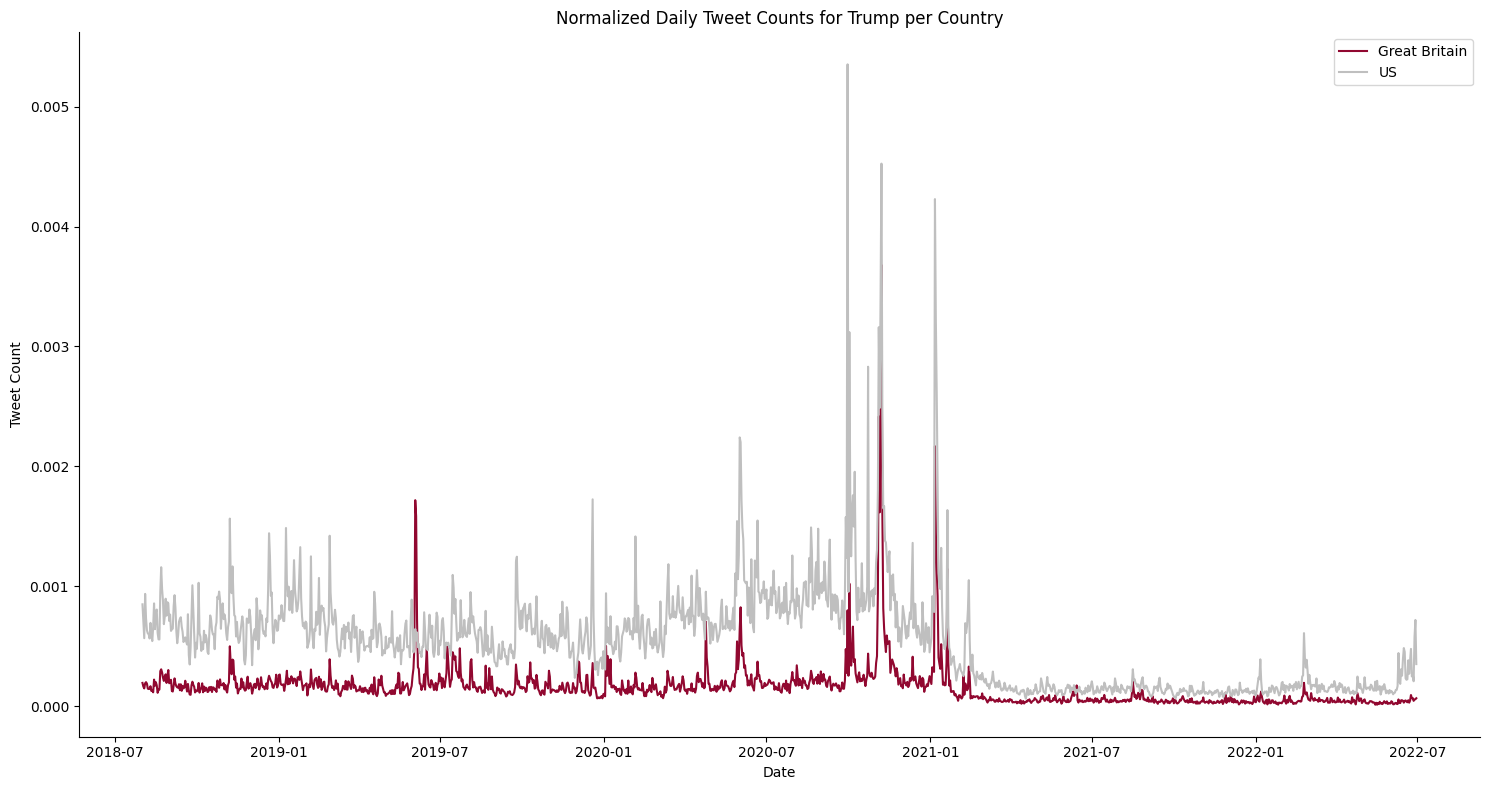

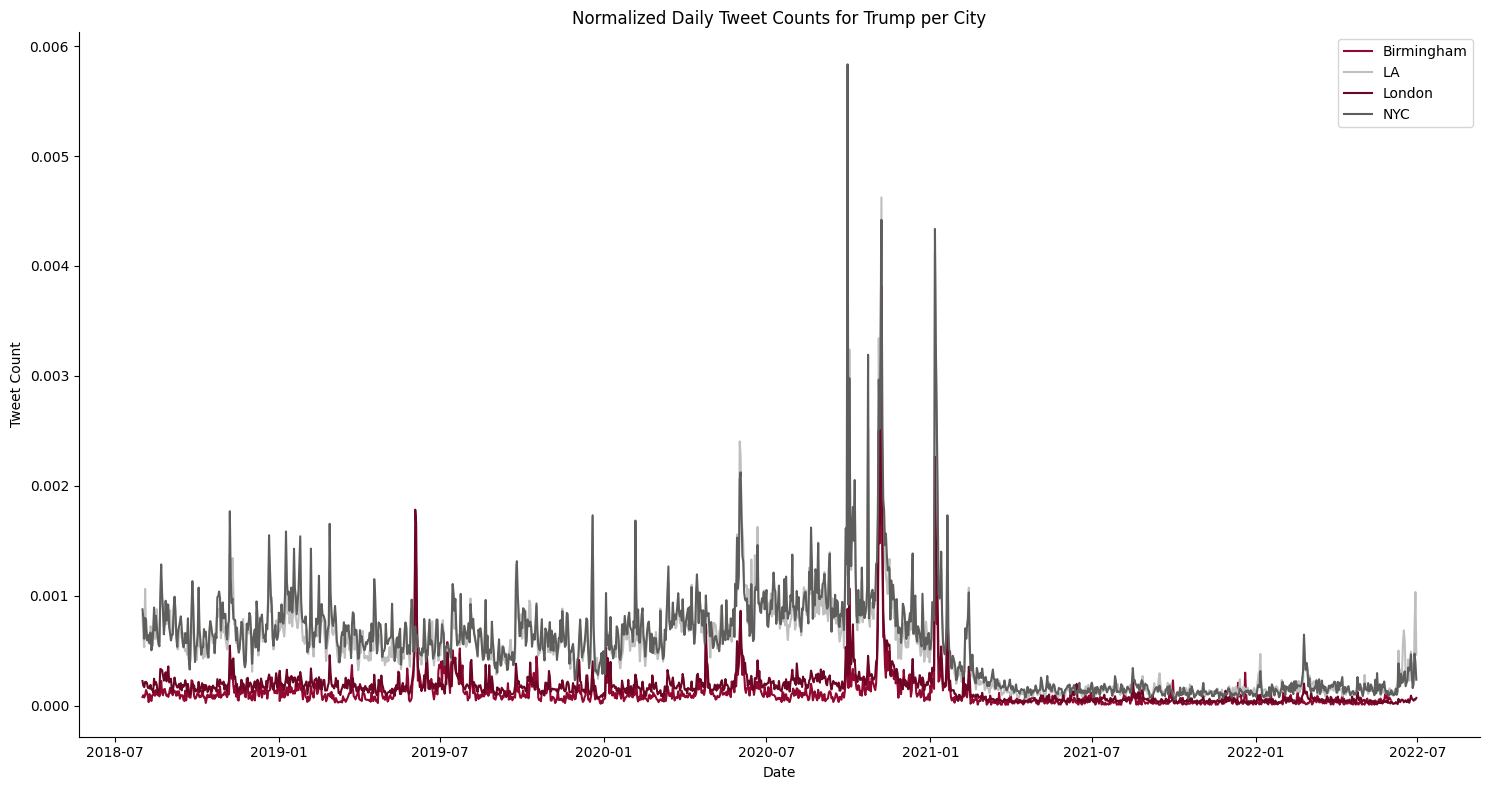

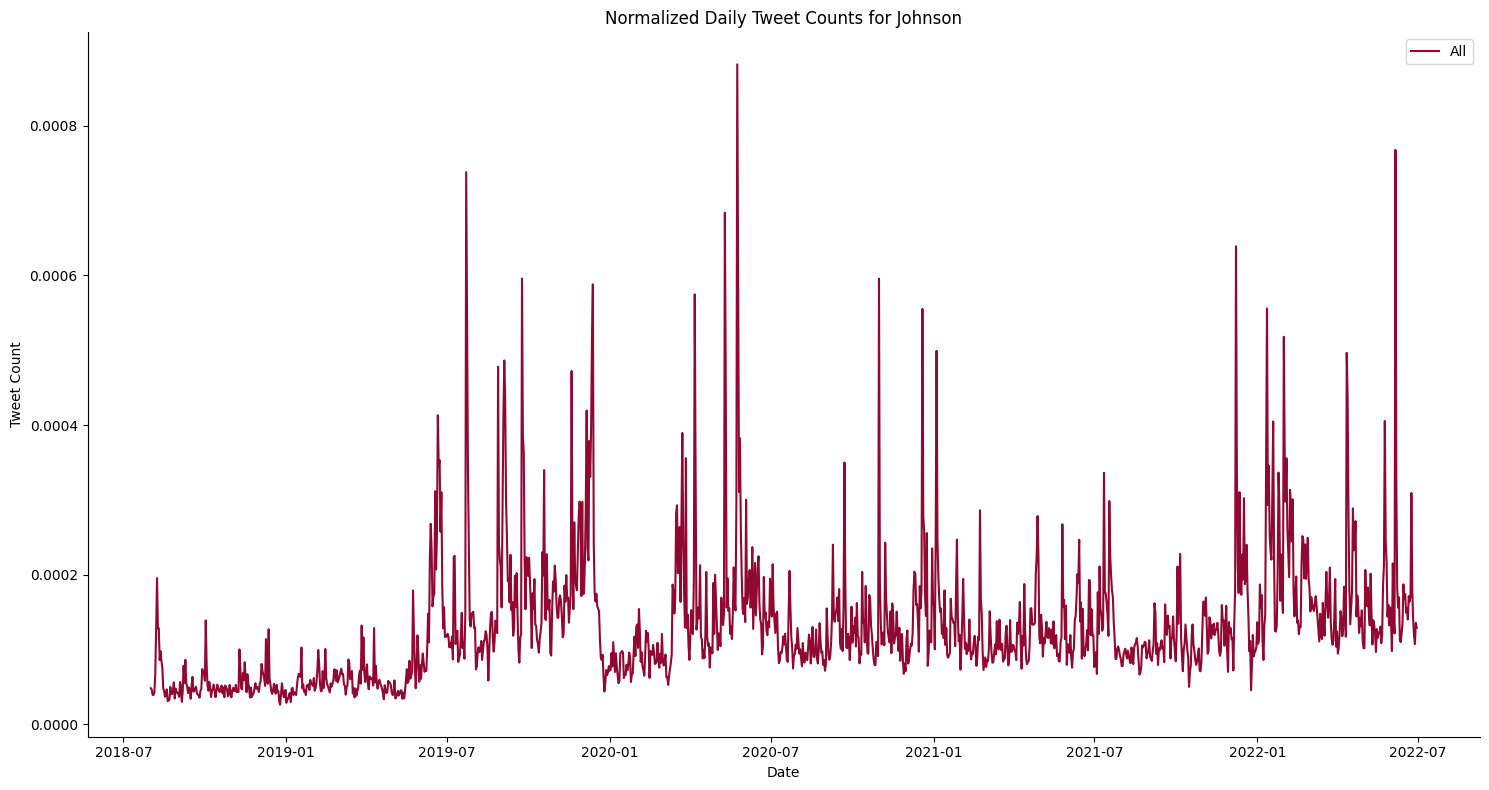

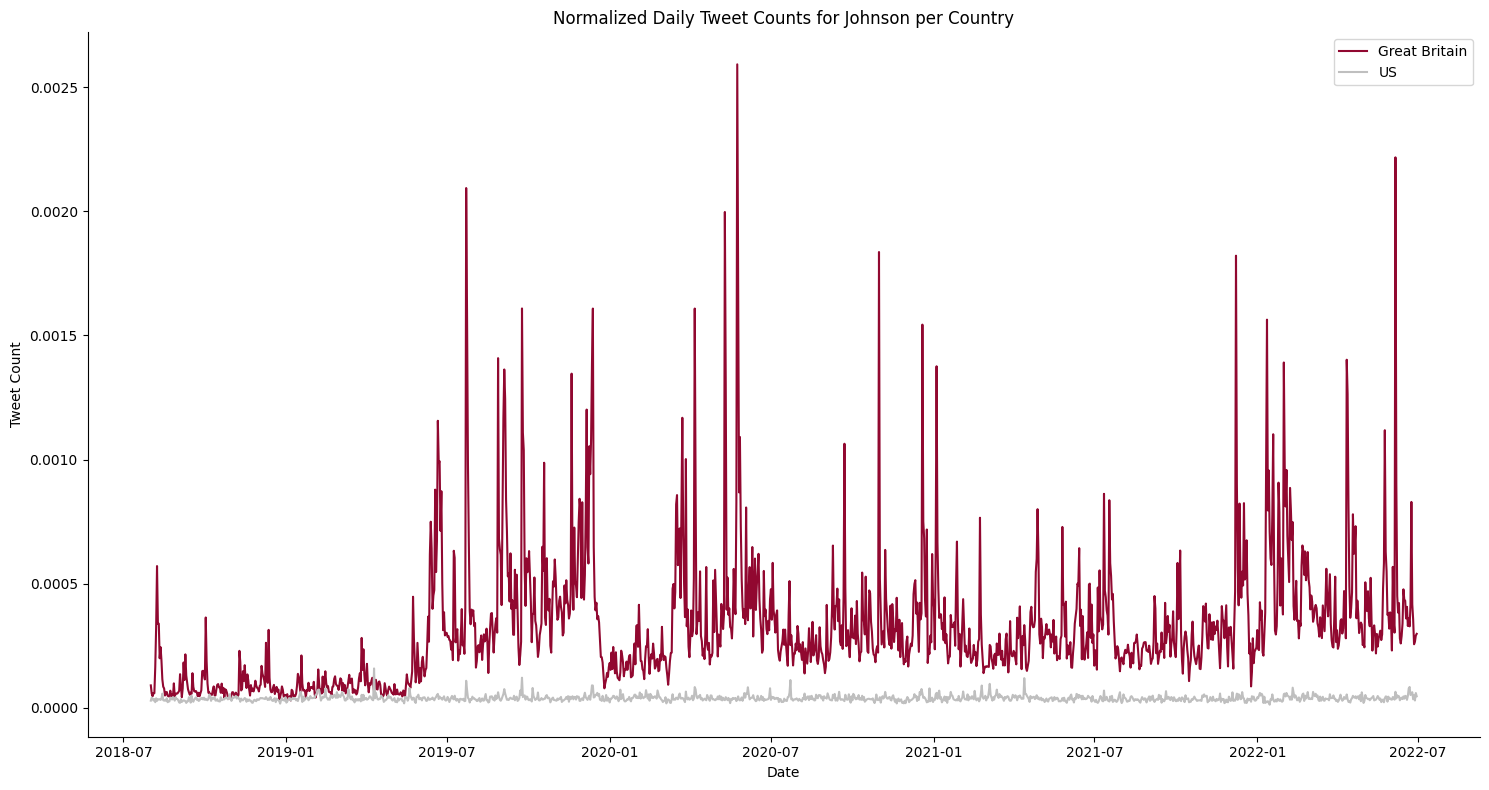

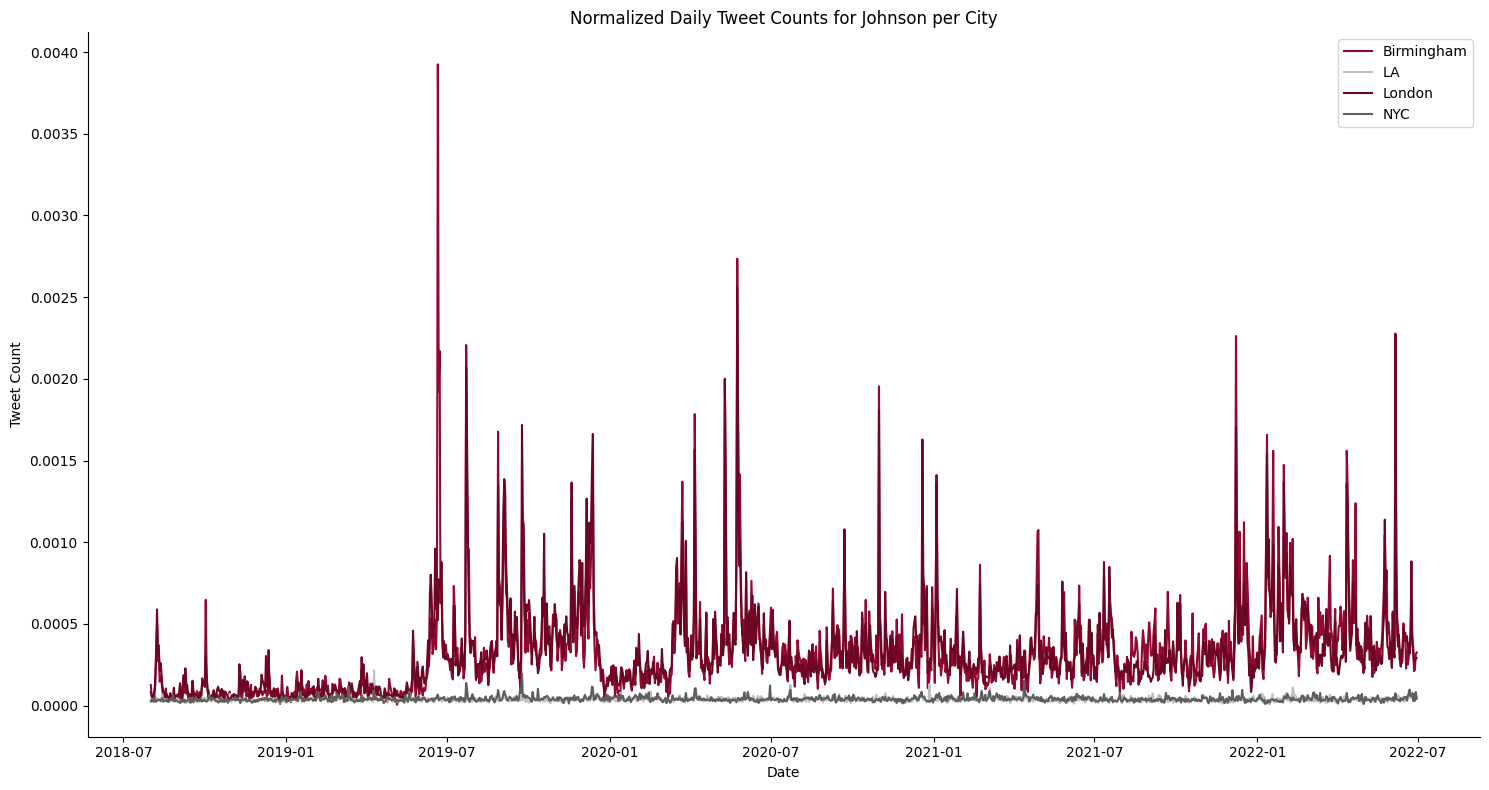

In [86]:
for president in presidents:
    data = normalized_daily_tweet_counts_trump if president == presidents[0] else normalized_daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-normalized_tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-normalized_tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-normalized_tweet_count.png'
    )

### Interpretation Tweet Count

##### Absolute Values

In [48]:
def get_top_dates(df, column, nlargest=10):
    """
    Get the rows corresponding to the highest 10 values of a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to find the top 10 values in.

    Returns:
    DataFrame: A DataFrame containing the rows with the top 10 values of the specified column.
    """
    return df.nlargest(nlargest, column)

def get_top_ten_days(data, president):
    for location in countries + cities:
        print(president.capitalize(), location)
        print(get_top_dates(data, location)[['day', location]].to_string(index=False),"\n")

In [80]:
# get original tweet data because it was previously normalized
daily_tweet_counts_trump = pd.read_pickle(f'{data_path}daily_tweet_counts_trump.pkl')
daily_tweet_counts_johnson = pd.read_pickle(f'{data_path}daily_tweet_counts_johnson.pkl')

In [51]:
get_top_ten_days(daily_tweet_counts_trump, presidents[0])
get_top_ten_days(daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07           3036
2020-11-06           2000
2020-11-04           1994
2021-01-06           1680
2019-06-03           1636
2019-06-04           1510
2020-11-05           1334
2020-11-08           1334
2021-01-07           1126
2021-01-08            888 

Trump US
       day   US
2020-09-30 9564
2020-11-07 8256
2021-01-06 6551
2020-11-06 6198
2020-10-02 5841
2020-11-04 5767
2020-10-23 5301
2021-01-07 5001
2020-11-05 4538
2020-11-08 4470 

Trump Birmingham
       day  Birmingham
2020-11-07       477.0
2020-11-06       327.0
2020-11-04       314.0
2021-01-06       269.0
2019-06-03       255.0
2020-11-05       227.0
2019-06-04       223.0
2020-11-08       217.0
2021-01-07       172.0
2021-01-20       140.0 

Trump LA
       day   LA
2020-09-30 4685
2020-11-07 4352
2020-11-06 3384
2020-10-02 3260
2021-01-06 3259
2020-11-04 3147
2020-10-23 2535
2021-01-07 2510
2020-11-05 2315
2020-06-01 2274 

Trump London
       day  London
2020-11-07    

##### Non-Normalized Clustered High Post-Frequency Dates

**Donald Trump**

✅ Overall
1. 2020-11-04 - 2020-11-08 (7761 + 5872 + 8198 + 11292 + 5804)
2. 2020-09-30 - 2020-10-02 (10210 + 6708)
3. 2021-01-06 - 2021-01-07 (8231 + 6127)
4. 2020-10-23 (5673)

✅ GB
1. 2020-11-04 - 2020-11-08 (1994 + 1334 + 2000 + 3036 + 1334)
2. 2019-06-03 - 2019-06-04 (1636 + 1510)
3. 2021-01-06 - 2021-01-07 (1680 + 1126)
4. 2021-01-20 (888)

✅ US
1. 2020-09-30 (9564) 
2. 2020-11-04 - 2020-11-08 (5767 + 4538 + 6198 + 8256 + 4470)
3. 2021-01-06 - 2021-01-07 (6551 + 5001)
4. 2010-10-02 (5841)
5. 2020-10-23 (5301)

✅ NYC
1. 2020-09-30 (4879) 
2. 2020-11-04 - 2020-11-08 (2620 + 2223 + 2814 + 3904 + 2219)
3. 2021-01-06 - 2021-01-07 (3292 + 2491)
4. 2020-10-23 (2766)
5. 2010-10-02 (2581)

✅ LA
1. 2020-09-30 - 2020-10-02 (4685 + 4685)
2. 2020-11-04 - 2020-11-07 (3147 + 2315 + 3384 + 4352)
3. 2021-01-06 - 2021-01-07 (3259 + 2510)
4. 2020-10-02 (3260)
5. 2020-10-23 (2535)
6. 2020-06-01 (2274)

✅ London
1. 2020-11-04 - 2020-11-08 (1680 + 1107 + 1673 + 2559 + 1117)
2. 2021-01-06 - 2021-01-07 (1411 + 954)
3. 2019-06-03 - 2019-06-04 (1381 + 1287)
4. 2021-01-08 (775) - outlier

✅ Birmingham
1. 2020-11-04 - 2020-11-07 (314 + 227 + 327 + 477)
2. 2021-01-06 - 2021-01-07 (269 + 172)
3. 2019-06-03 - 2019-06-04 (255 + 223)
4. 2020-11-08 (217) 
5. 2021-01-20 (140)


**Boris Johnson**

✅ Overall
1. 2020-05-24 - 2020-05-25 (2526 + 1737)
2. 2019-07-23 - 2019-07-24 (2212 + 1637)
3. 2020-05-10 (1958)
4. 2020-04-06 (1724)
5. 2019-12-12 - 2019-12-13 (1492 + 1701)
6. 2019-09-24 (1646)
7. 2020-10-31 (1620)

✅ GB
1. 2020-05-24 - 2020-05-25 (2463 + 1491)
2. 2019-07-23 - 2019-07-24 (1988 + 1637)
3. 2020-05-10 (1898)
The rest is roughly on a similar level:
4. 2020-10-31 (1556)
5. 2020-04-06 (1553)
6. 2019-12-13 (1526)
7. 2019-09-24 (1460)
8. 2022-06-06 (1323)

✅ US: completely different to GB. Different dates etc.
1. 2019-04-10 (288)
2. 2020-04-06 (171)
3. 2019-09-24 (236)
4. 2019-07-23 (224)
5. 2020-07-23 (198)
6. 2019-12-12 - 2019-12-13 (177 + 175)
7. 2019-10-06 (168)
8. 2019-02-14 (157)
9. 2019-05-20 (152)

✅ LA
1. 2019-04-10 (209)
2. 2020-07-23 (120)
3. 2020-12-27 (104)
4. 2019-02-14 (101)
5. 2019-07-23 (97)
6. 2019-02-05 + 2019-02-07 (94 + 96)
7. 2020-02-16 (91)
8. 2018-10-29 (90)
9. 2019-10-06 (89)


✅ Johnson NYC: US cities differ completely
1. 2019-09-22 + 2019-09-24 (97 + 174)
2. 2019-07-23 - 2019-07-24 (95 + 127)
3. 2019-12-12 - 2019-12-13 (102 + 97)
4. 2020-06-30 (101)
5. 2019-10-12 (98)
6. 2020-04-07 (96)
7. 2019-03-12 (95)  

✅ London
1. 2020-05-24 - 2020-05-25 (1964 + 1349)
2. 2019-07-23 (1602)
3. 2020-05-10 (1533)
4. 2019-12-13 (1277)
5. 2019-09-24 (1272)
6. 2019-07-24 (1251)
7. 2020-10-31 (1251)
8. 2020-04-06 (1221)
9. 2019-12-12 (1106)
    

✅ Birmingham: 2019-06-21 - 2019-06-23 relevant in BI, but not in LO; 2019-09-24, 2019-07-24, 2020-04-06, 2019-12-12 in LO, but not BI
1. 2019-06-21 - 2019-06-23 (696 + 341 + 385)
2. 2020-05-24 - 2020-05-25 (499 + 299)
3. 2019-07-23 (386)
4. 2020-05-10 (365)
5. 2020-04-06 (332)
6. 2020-10-31 (305)
7. 2019-08-28 (284)

##### Observations and Abnormalities

**General**
- After one or at maximum 4 days (usually 1-2), Twitter does not talk about scandals as much $\rightarrow$  News seem to become irrelevant after a couple of days and then irrelevant after that
- Birmingham has a higher variance (calc values or show bar graphs) than other cities -> maybe because of smaller dataset 

**Donald Trump**

Overall (trump-normalized_tweet_count.png)
- peaks
    - 3 considerate peaks at the end of the presidency (20 January 2017 – 20 January 2021) (TODO: check exact numbers)
        1. 2020-11-04 - 2020-11-08 (7761 + 5872 + 8198 + 11292 + 5804)
        2. 2020-09-30 - 2020-10-02 (10210 + 6708)
        3. 2021-01-06 - 2021-01-07 (8231 + 6127)
    - less significant peaks
        4. 2020-10-23 (5673)
        5. optional TODO: check more than the 10 most significant days

Countries (trump-countries-normalized_tweet_count.png)
- US has a slightly higher baseline compared to GB (maybe because it is their president -> TODO: CALC overall MEAN)
- mostly the same outliers (= reaction to events), e. g. 2021-01-06 - 2021-01-07
- sometimes different intensity of reaction:
    - GB strong reaction 2019-06-03 - 2019-06-04 (and slightly less extreme in 2019-12), but no noticable difference in the the tweet count from the US. Same in 2022-07, but maybe because higher variance in GB because of smaller dataset
    - US stronger reaction (more posts) from 2020-11-04 - 2020-11-08 (attention: this is the day which has the highest non-normalized post count in GB, but not in US. Nevertheless, this is an observation in the normalized data)

Cities (trump-cities-normalized_tweet_count.png)
- primarily Birmingham is responsible for the GB peak in 2019-06-03 - 2019-06-04 and 2020-11-04 - 2020-11-08
- London is primarily responsible for the GB peak in 2021-01-06 - 2021-01-07
- very similar baseline of all cities (TODO: clip visualization at 7.5e-09 and check if i still think the same because the Birmingham peak could make the difference seem small)
- NYC and LA are very similar; Birmingham has a slightly higher baseline as London (TODO: CALC MEAN BASELINE)

**Boris Johnson**

Overall (johnson-normalized_tweet_count.png)
- Johnson was Foreign Secretary from 2016 to 2018 and Prime Minister of the United Kingdom and Leader of the Conservative Party from 24 July 2019 to 6 September 2022.
- more posts from 2019-06 - 2020-01
- many peaks: TODO: check what happened
    1. 2020-05-24 - 2020-05-25 (2526 + 1737)
    2. 2019-07-23 - 2019-07-24 (2212 + 1637)
    3. 2020-05-10 (1958)
    4. 2020-04-06 (1724)
    5. 2019-12-12 - 2019-12-13 (1492 + 1701)
    6. 2019-09-24 (1646)
    7. 2020-10-31 (1620)
    more: check post 1400+
    
Countries
- US has few posts about Johnson; Only GB has a higher baseline and variance than US; GB is almost exclusively responsible for the overall post count about Johnson
- In non-normalized graph: US is completely different to GB. Different dates etc.
- TODO: check difference between overall and country because it looks unusual when you compare the non-normalized with the normalized one
- Phases
    - Since 2021-11 until end of data: high variance and higher baseline in GB
    - 2019-07 - 2020-01 higher baseline (and 2020-04 - 2020-07) -> covid lockdown?

Cities
- Birmingham significantly higher baseline (same as with president Trump)
- LA & NYC are very similar again (in US/larger city -> national media more important)
- In non-normalized graph:
    - US cities differ completely. Maybe normalization was too strong?
    - 2019-06-21 - 2019-06-23 relevant in BI, but not in LO; 2019-09-24, 2019-07-24, 2020-04-06, 2019-12-12 in LO, but not BI

##### Normalized Values

In [52]:
get_top_ten_days(normalized_daily_tweet_counts_trump, presidents[0])
get_top_ten_days(normalized_daily_tweet_counts_johnson, presidents[1])

Trump Great Britain
       day  Great Britain
2020-11-07   4.461374e-09
2020-11-06   2.938982e-09
2020-11-04   2.930165e-09
2021-01-06   2.798798e-09
2020-11-05   1.960301e-09
2020-11-08   1.960301e-09
2021-01-07   1.875861e-09
2019-06-03   1.804929e-09
2019-06-04   1.665919e-09
2021-01-08   1.479365e-09 

Trump US
       day           US
2020-09-30 2.995389e-09
2021-01-06 2.729637e-09
2020-11-07 2.479675e-09
2021-01-07 2.083791e-09
2020-11-06 1.861559e-09
2020-11-04 1.732109e-09
2021-01-08 1.681700e-09
2020-10-02 1.666123e-09
2020-10-23 1.512090e-09
2020-11-05 1.362980e-09 

Trump Birmingham
       day   Birmingham
2020-11-07 2.016535e-08
2020-11-06 1.382404e-08
2020-11-04 1.327446e-08
2021-01-06 1.169650e-08
2020-11-05 9.596507e-09
2020-11-08 9.173753e-09
2019-06-03 8.109981e-09
2021-01-07 7.478804e-09
2019-06-04 7.092258e-09
2021-01-20 6.087399e-09 

Trump LA
       day           LA
2021-01-06 5.221272e-09
2020-09-30 5.184541e-09
2020-11-07 4.911105e-09
2021-01-07 4.021293e-09
2020-